# COMP 6630 Project
## Group Members: Elliott Baker, Tiffany Wu, Thomas Bowman
### Instructor: Dr. Karmaker

This is the source code for the final project for COMP 6630 at Auburn University Fall 2023. The source code includes the following models implemented: 

1. Decision Tree Classifier
2. Naive Bayes Classifier
3. Logistic Regression
4. Support Vector Machine
5. Multi-layer Perceptron (MLP)

We have implemented all of these models using a [dataset](https://www.kaggle.com/datasets/arvindnagaonkar/flight-delay) containing flight delay data. This dataset includes flight information from 2018-2023 from the Bureau of Transportation. The original set had more than 30 million entries and 40 attributes. We have selected 110,000 entries, 20 attributes, and 3 classes: early, on time, and late. Performance metrics are given for each model. Each model is implemented separately within a block. Our code can best be used by first running the blocks that import the data, and then running each model independently as you choose.

Import the necessary libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn import metrics
from sklearn import tree

We read in the original data as a parquet file and convert it to a pandas dataframe. The 20 features are chosen, and the label is "ArrDelay".

In [3]:
data = pd.read_parquet(r"features_added.parquet")
data.dropna()
data = data.iloc[:110000]

string_columns = data.select_dtypes(include=['object']).columns
label_encoder = LabelEncoder()

for col in string_columns:
    data[col] = label_encoder.fit_transform(data[col])

feature_cols = [
    "Year",
    "Month",
    "DayofMonth",
    "Marketing_Airline_Network",
    "OriginCityName",
    "DestCityName",
    "DepTime",
    "TaxiOut",
    "TaxiIn",
    "ArrTime",
    "CRSElapsedTime",
    "ActualElapsedTime",
    "AirTime",
    "Distance",
    "DistanceGroup",
    "DayofWeek",
    "Holidays", 
    "WheelsOffMinute",
    "WheelsOffHour",
    "WheelsOnMinute"
]

In [17]:
X = data[feature_cols].values
y = data["ArrDelay"].values

# 3 bins are created: early, on-time, and late with on-time defined as no more than 9 minutes early or late
bins = np.array([-1000000000, -9.0, 9.0, 1000000000])
labels = np.digitize(y, bins)

# data separated into testing and training
X_train, X_test, y_train, y_test = train_test_split(X, labels, test_size=0.15, random_state=1)

### Decision Tree Classifier

In [18]:
training_accuracy = []
testing_accuracy = []

training_precision = []
testing_precision = []

training_recall = []
testing_recall = []

training_f1 = []
testing_f1 = []
for depth in range(1, 31):
    clf = DecisionTreeClassifier(max_depth=depth)
    clf = clf.fit(X_train, y_train)
    y_pred_train = clf.predict(X_train)
    y_pred_test = clf.predict(X_test)

    training_accuracy.append(metrics.accuracy_score(y_train, y_pred_train))
    testing_accuracy.append(metrics.accuracy_score(y_test, y_pred_test))
    
    training_precision.append(metrics.precision_score(y_train, y_pred_train, average='macro', zero_division=np.nan))
    testing_precision.append(metrics.precision_score(y_test, y_pred_test, average='macro', zero_division=np.nan))

    training_recall.append(metrics.recall_score(y_train, y_pred_train, average='macro'))
    testing_recall.append(metrics.recall_score(y_test, y_pred_test, average='macro'))

    training_f1.append(metrics.f1_score(y_train, y_pred_train, average='macro'))
    testing_f1.append(metrics.f1_score(y_test, y_pred_test, average='macro'))

    print("Depth: ", depth)
    print("Training Accuracy:", '{:.2f}'.format(metrics.accuracy_score(y_train, y_pred_train)))
    print("Testing Accuracy:", '{:.2f}'.format(metrics.accuracy_score(y_test, y_pred_test)))
    print("")

Depth:  1
Training Accuracy: 0.53
Testing Accuracy: 0.53

Depth:  2
Training Accuracy: 0.55
Testing Accuracy: 0.55

Depth:  3
Training Accuracy: 0.55
Testing Accuracy: 0.55

Depth:  4
Training Accuracy: 0.56
Testing Accuracy: 0.55

Depth:  5
Training Accuracy: 0.57
Testing Accuracy: 0.56

Depth:  6
Training Accuracy: 0.58
Testing Accuracy: 0.57

Depth:  7
Training Accuracy: 0.60
Testing Accuracy: 0.58

Depth:  8
Training Accuracy: 0.61
Testing Accuracy: 0.59

Depth:  9
Training Accuracy: 0.62
Testing Accuracy: 0.60

Depth:  10
Training Accuracy: 0.63
Testing Accuracy: 0.61

Depth:  11
Training Accuracy: 0.65
Testing Accuracy: 0.61

Depth:  12
Training Accuracy: 0.67
Testing Accuracy: 0.61

Depth:  13
Training Accuracy: 0.68
Testing Accuracy: 0.62

Depth:  14
Training Accuracy: 0.71
Testing Accuracy: 0.62

Depth:  15
Training Accuracy: 0.73
Testing Accuracy: 0.62

Depth:  16
Training Accuracy: 0.75
Testing Accuracy: 0.62

Depth:  17
Training Accuracy: 0.78
Testing Accuracy: 0.62

Depth:

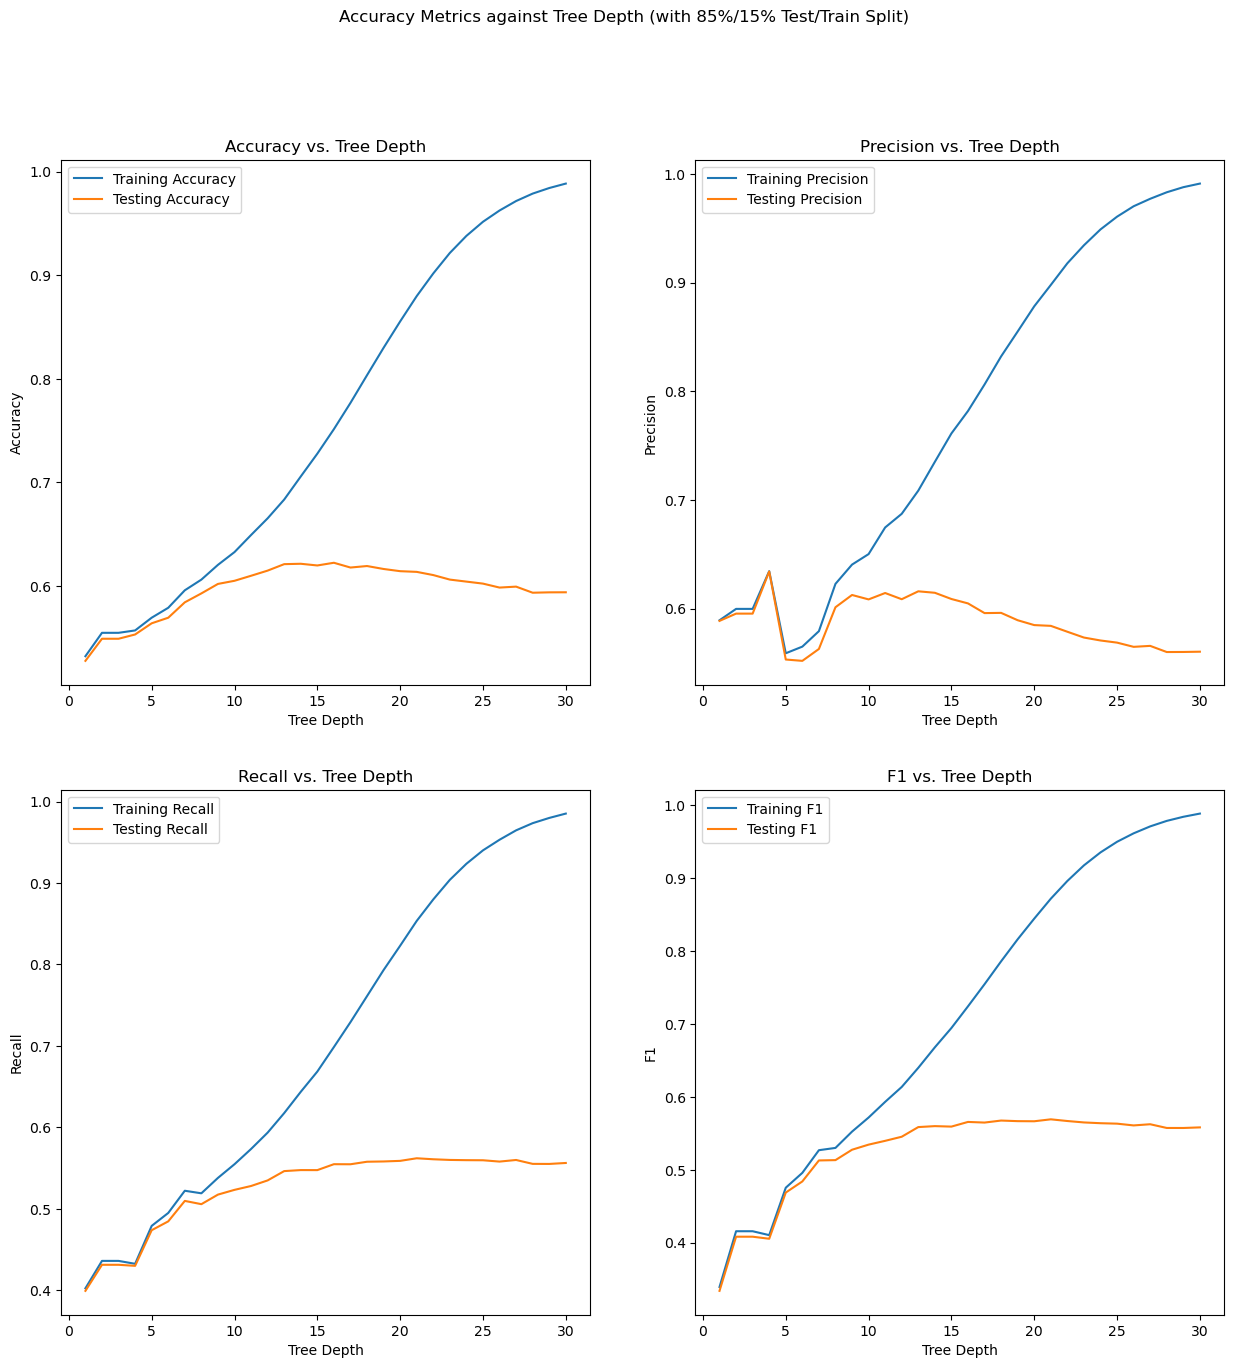

In [21]:
def make_plot(axs):
    ax1 = axs[0,0]
    ax1.plot(range(1, 31), training_accuracy, label="Training Accuracy")
    ax1.plot(range(1, 31), testing_accuracy, label="Testing Accuracy")
    ax1.set_ylabel("Accuracy")
    ax1.set_xlabel("Tree Depth")
    ax1.set_title("Accuracy vs. Tree Depth")
    ax1.legend()

    ax2 = axs[0,1]
    ax2.plot(range(1, 31), training_precision, label="Training Precision")
    ax2.plot(range(1, 31), testing_precision, label="Testing Precision")
    ax2.set_ylabel("Precision")
    ax2.set_xlabel("Tree Depth")
    ax2.set_title("Precision vs. Tree Depth")
    ax2.legend()

    ax3 = axs[1,0]
    ax3.plot(range(1, 31), training_recall, label="Training Recall")
    ax3.plot(range(1, 31), testing_recall, label="Testing Recall")
    ax3.set_ylabel("Recall")
    ax3.set_xlabel("Tree Depth")
    ax3.set_title("Recall vs. Tree Depth")
    ax3.legend()

    ax4 = axs[1,1]
    ax4.plot(range(1, 31), training_f1, label="Training F1")
    ax4.plot(range(1, 31), testing_f1, label="Testing F1")
    ax4.set_ylabel("F1")
    ax4.set_xlabel("Tree Depth")
    ax4.set_title("F1 vs. Tree Depth")
    ax4.legend()

fig, axs = plt.subplots(2, 2, figsize=(15, 15))
make_plot(axs)
fig.suptitle("Accuracy Metrics against Tree Depth (with 85%/15% Test/Train Split)")
plt.show()

### Naive Bayes Classifier